<a href="https://colab.research.google.com/github/invoker-qqwrv/Beida_tensorflow/blob/main/4_6acc%26loss_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 训练集loss：loss
# 测试集loss：val_loss
# 训练集准确率：sparse_categorical_accuracy
# 测试集准确率:val_sparse_categorical_accuracy
# 接下来代码实现训练集和测试集acc&loss曲线数据集的显示

#入门级的八股一定能用这套代码实现

Streaming output truncated to the last 5000 lines.
         6.09861799e-02, -1.26035452e-01,  2.36746557e-02,
        -1.97240058e-02,  6.93255067e-02,  4.73556034e-02,
         1.78282615e-02, -6.25637695e-02, -1.31916944e-02,
        -1.02910988e-01, -7.89023936e-02,  1.58458710e-01,
         1.10961884e-01,  4.85177264e-02, -8.94533470e-02,
         1.20226502e-01,  2.13441893e-01,  3.43054496e-02,
         2.81183398e-04, -8.06997269e-02,  2.64006332e-02,
         1.98303107e-02, -7.42045268e-02,  4.11404483e-02,
         7.15733021e-02, -4.03729528e-02,  1.53463539e-02,
        -1.08918756e-01,  1.84153154e-01,  5.14354594e-02,
         1.47006318e-01,  1.58371016e-01, -1.72095699e-03,
         8.76504704e-02,  2.59034596e-02, -1.38797298e-01,
        -1.26523763e-01, -1.15167364e-01, -9.40817669e-02,
        -2.87096113e-01, -4.82435748e-02, -1.71973288e-01,
        -1.22783184e-01,  5.13915159e-02, -6.57110214e-02,
         1.75065324e-02,  4.19055820e-02, -2.76436545e-02,
     

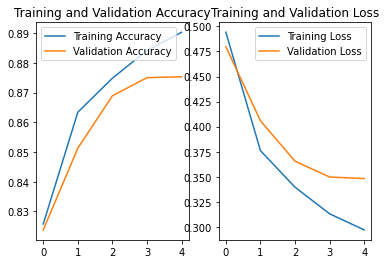

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/fashion.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                        save_weights_only=True,
                        save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################show###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']#用history.history函数提取model.fit函数中保存的训练集准确率
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']#训练集损失函数数值
val_loss = history.history['val_loss']#测试集损失函数数值

plt.subplot(1, 2, 1)#分成一行两列，画出第一列
plt.plot(acc, label='Training Accuracy')#图标题
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')#tuli 
plt.legend()

plt.subplot(1, 2, 2)#以下代码画出第二列
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
